In [1]:
from keras_retinanet.preprocessing.pascal_voc_grid_crops import PascalVocGridCropsGenerator
from keras_retinanet.utils.visualization import draw_box
from keras_retinanet.utils.colors import label_color
from keras_retinanet.utils.image import read_image_bgr

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [3]:
generator = PascalVocGridCropsGenerator(
        500, 500, 150, 150, 0.75, group_by_image=True, data_dir="../../../data/laddv4/spring", set_name='test')

In [4]:
def show_crops(crops_group, rows, cols):
    fig, axis = plt.subplots(rows, cols, figsize=(30, 15))

    for col in range(cols):
        for row in range(rows):
            c = col*rows + row
            if rows > 1:
                ax = axis[row, col]
            else:
                ax = axis[col]
            ax.axis('off')
                    
            ax.imshow(crops_group[c])   

In [5]:
def show_annotations(crops_group, annotations_group):
    #print(annotations_group)
    
    non_empty = [(crop, annotations) for (crop, annotations) in zip(crops_group, annotations_group)
                 if len(annotations['bboxes']) > 0]
    
    count = len(non_empty)
    fig, axis = plt.subplots(1, count, figsize=(15, 15))
    i = 0
    for crop, annotations in non_empty:
        if count > 1:
            ax = axis[i]
            i += 1
        else:
            ax = axis
        ax.axis('off')
          
        draw = crop.copy()
        for bbox in  annotations['bboxes']:
            draw_box(draw, bbox, label_color(0))
                    
        ax.imshow(draw)  

In [6]:
def show_image(group_index):
    image_index = generator.groups[group_index][0].image_index
    image = read_image_bgr(generator.image_path(image_index))
    annotations = generator.load_annotations(image_index)
    draw = image.copy()
    
    for bbox in  annotations['bboxes']:
        draw_box(draw, bbox, label_color(0))
    plt.figure(figsize=(15, 15))
    plt.axis('off')
    plt.imshow(draw)
    #print(annotations)
    #print(image_index)

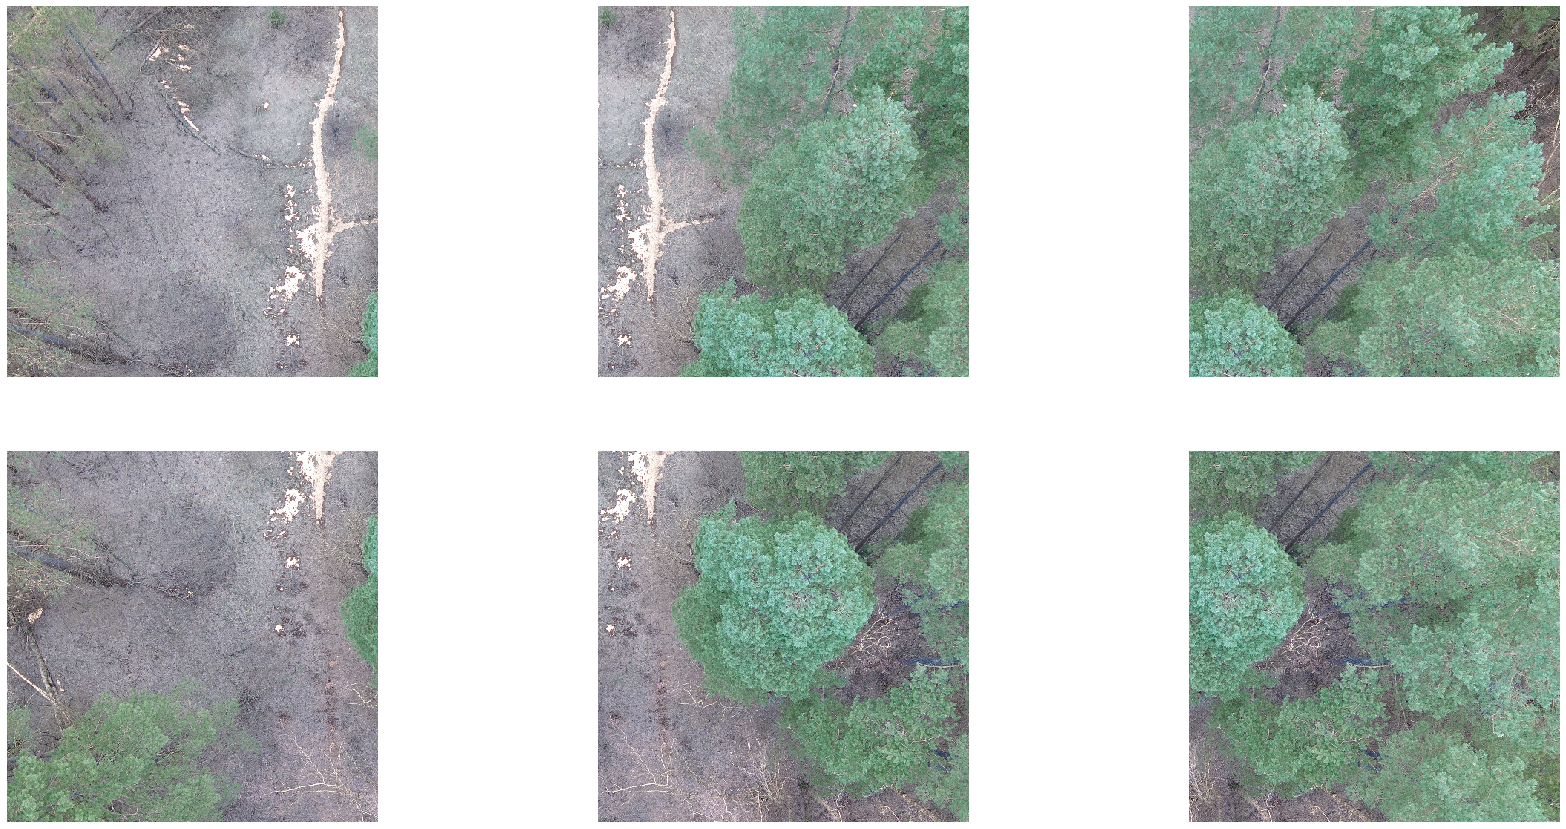

In [7]:
group_index = 39
group = generator.groups[group_index]
crops_group = generator.load_image_group(group)
#print(len(crops_group))
show_crops(crops_group, 2, 3)

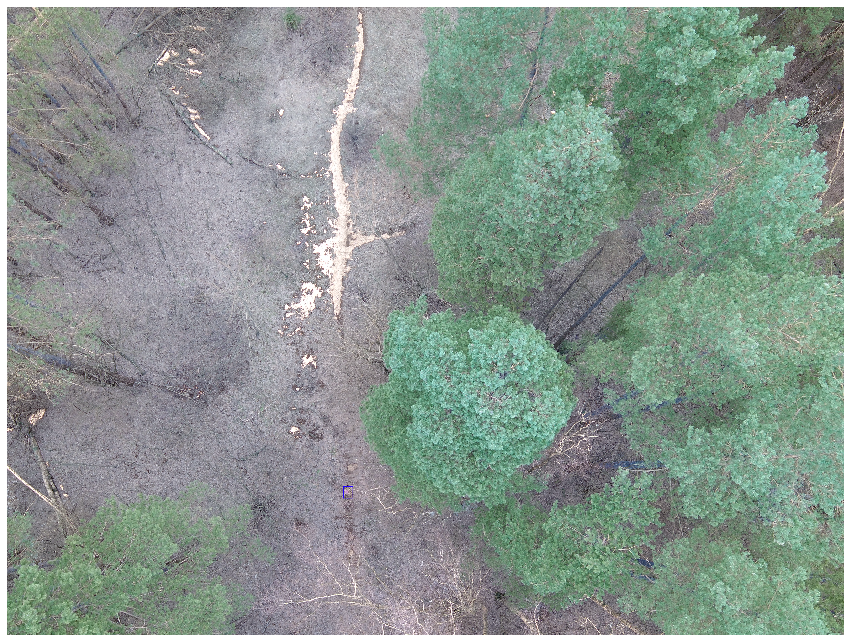

In [8]:
show_image(group_index)

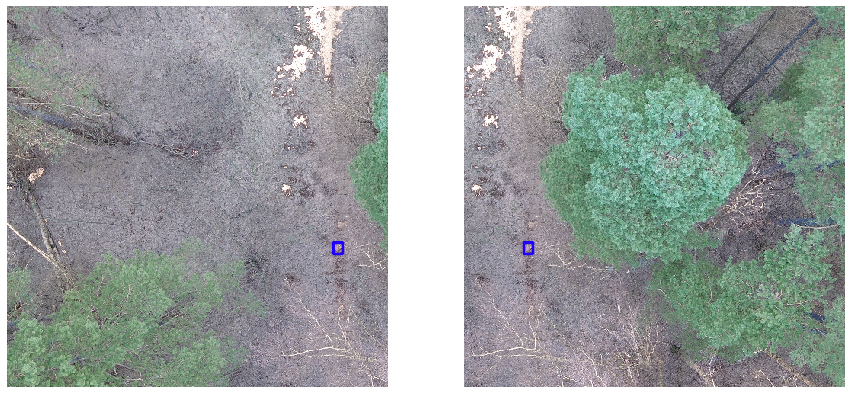

In [9]:
annotations_group = generator.load_annotations_group(group)
show_annotations(crops_group, annotations_group)

In [10]:
generator = PascalVocGridCropsGenerator(
        1333, 800, 150, 150, 0.75,
        group_by_image=False,
        batch_size=8,
        shuffle_groups=False,
        data_dir="../../../data/laddv4/full",
        set_name='test')

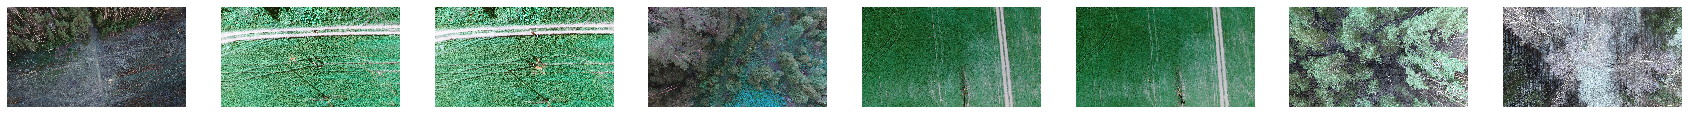

In [11]:
crops_group = generator.load_image_group(generator.groups[14])
show_crops(crops_group, 1, 8)

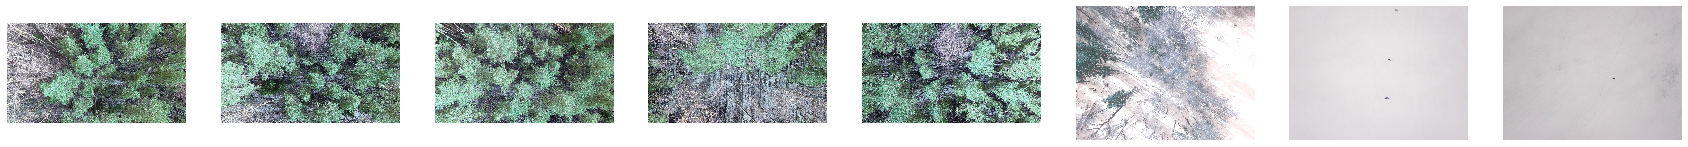

In [12]:
crops_group = generator.load_image_group(generator.groups[15])
show_crops(crops_group, 1, 8)